In [ ]:
!pip install contractions
!pip install emoji
!pip install ekphrasis
!pip install -U -q PyDrive
!pip install yfinance --upgrade --no-cache-dir

import pandas as pd
import re
import emoji
import nltk
import contractions
import torch

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize 
from nltk.tokenize.treebank import TreebankWordDetokenizer
import requests 
from pprint import pprint
import numpy as np
from nltk.stem import PorterStemmer

import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from tensorflow import keras

import os
import pprint
import json
import random
import string
import sys
from ekphrasis.classes.segmenter import Segmenter
import itertools


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

import datetime
from datetime import datetime, timedelta, date

import yfinance as yf
from datetime import datetime, timedelta, date

#mount's to Google Drive
drive.mount('/content/drive')

#connect's to Google Cloud SDK
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
pb = '/content/drive/My Drive/StockTwits Data Binary/'
pp = '/content/drive/My Drive/StockTwits Data Percentage/'
l1 = 'label2.1.csv'
l2 = 'label2.2.csv'

In [ ]:
binary_same = [pb+'T_binary_'+l2,pb+'HD_binary_'+l2,pb+'PG_binary_'+l2,pb+'V_binary_'+l2]
binary_prev = [pb+'T_binary_'+l1,pb+'HD_binary_'+l1,pb+'PG_binary_'+l1,pb+'V_binary_'+l1]
percentage_same = [pp+'T_'+l2,pp+'HD_'+l2,pp+'PG_'+l2,pp+'V_'+l2]
percentage_prev = [pp+'T_'+l1,pp+'HD_'+l1,pp+'PG_'+l1,pp+'V_'+l1]

method = [binary_same,binary_prev,percentage_same,percentage_prev]

y = 0

for x in method:
  li = []
  for filename in method[y]:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
  df = pd.concat(li, axis=0, ignore_index=True)
  df.to_csv('combined_'+str(y)+'.csv', index=False)
  y = y+1


In [ ]:
binary_same = pd.read_csv('/content/combined_0.csv')
binary_prev = pd.read_csv('/content/combined_1.csv')
percentage_same = pd.read_csv('/content/combined_2.csv')
percentage_prev = pd.read_csv('/content/combined_3.csv')

In [ ]:
print('Binary same day value counts:')
print(binary_same['label'].value_counts())
print()
print('Binary prev day value counts:')
print(binary_prev['label'].value_counts())
print()
print('Percentage same day value counts:')
print(percentage_same['label'].value_counts())
print()
print('Percentage prev day value counts:')
print(percentage_prev['label'].value_counts())

Binary same day value counts:
1    105165
0     98864
Name: label, dtype: int64

Binary prev day value counts:
1    108424
0     95605
Name: label, dtype: int64

Percentage same day value counts:
 1    74316
 0    68339
-1    61374
Name: label, dtype: int64

Percentage prev day value counts:
 0    77225
 1    66462
-1    60342
Name: label, dtype: int64


In [ ]:
colors = ['cornflowerblue', 'lightcoral', 'antiquewhite']

In [ ]:
print('binary_same')
plt.figure(figsize = (9,3))
ax = plt.pie(binary_same['label'].value_counts(), colors = colors, autopct="%1.1f%%", labels=["Positive","Negative"])

In [ ]:
print('binary_prev')
plt.figure(figsize = (9,3))
ax = plt.pie(binary_prev['label'].value_counts(), colors = colors, autopct="%1.1f%%", labels=["Positive","Negative"])

percentage_same


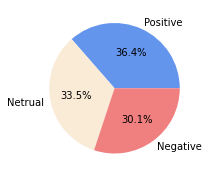

In [ ]:
print('percentage_same')
colors = ['cornflowerblue', 'antiquewhite', 'lightcoral']
plt.figure(figsize = (9,3))
ax = plt.pie(percentage_same['label'].value_counts(), colors = colors, autopct="%1.1f%%", labels=["Positive","Netrual","Negative"])

percentage_prev


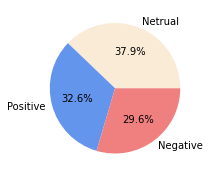

In [ ]:
print('percentage_prev')
colors = ['antiquewhite', 'cornflowerblue', 'lightcoral']
plt.figure(figsize = (9,3))
ax = plt.pie(percentage_prev['label'].value_counts(), colors = colors, autopct="%1.1f%%", labels=["Netrual","Positive","Negative"])

In [ ]:
df['symbol'].value_counts()

T     70091
HD    52425
V     50100
PG    31413
Name: symbol, dtype: int64

[Text(0, 0.5, ''), Text(0.5, 0, 'Number of StockTwits messages')]

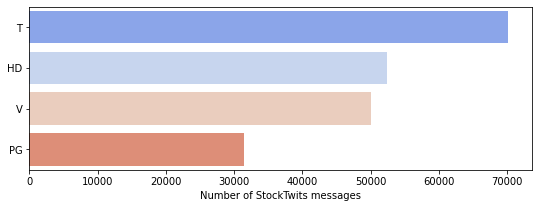

In [ ]:
plt.figure(figsize = (9,3))
plt.ticklabel_format(style='plain', axis='x')


ax = sns.countplot(y="symbol", data=df, palette=("coolwarm"), order = df['symbol'].value_counts().index)
ax.set(xlabel='Number of StockTwits messages', ylabel='')

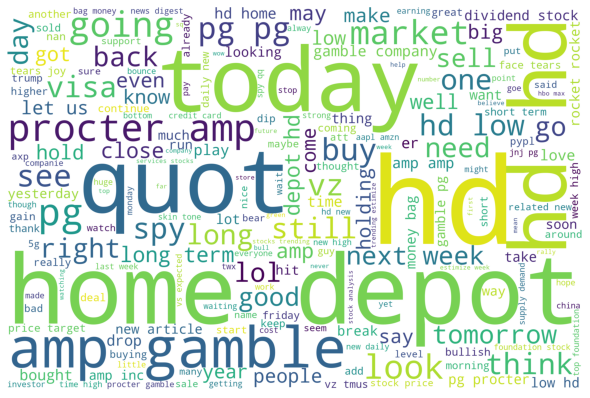

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2400, height = 1600, background_color ='white',stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()